In [55]:
import pandas as pd
import doex
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from scipy.stats import skew, norm, probplot, boxcox, kstest, bartlett, chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.stats.libqsturng import psturng
from statsmodels.stats.anova import anova_lm

In [2]:
data = pd.read_csv("C:/Users/thoma/Desktop/호진/t_academy/실험계획법 프로젝트/searchtime.csv")

data.head()

,SearchEngine,person,time
0,Google,a,35.0
1,Google,a,100.0
2,Google,a,50.0
3,Google,a,72.0
4,Google,b,35.0


In [3]:
model = ols('time ~ SearchEngine * person', data).fit()

anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
SearchEngine,2.0,41436.902775,20718.451388,4.597995,0.014322
person,5.0,47055.539463,9411.107893,2.088584,0.080938
SearchEngine:person,10.0,80987.996325,8098.799633,1.797347,0.083284
Residual,54.0,243322.658225,4505.975152,NaN,NaN


귀무가설: 검색 엔진에 따라 검색 속도에 유의한 차이가 있다.

대립가설: 검색 엔진에 따라 검색 속도에 유의한 차이가 없다.

In [4]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     2.212
Date:                Thu, 12 Jan 2023   Prob (F-statistic):             0.0141
Time:                        13:22:20   Log-Likelihood:                -394.68
No. Observations:                  72   AIC:                             825.4
Df Residuals:                      54   BIC:                             866.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             55.2500     33.563      1.646      0.106     -12.040     122.540
SearchEngine[T.Google]                 9.0000     47.466      0.190      0.850     -86.163     104.163
SearchEngine[T.Naver]                  8.5000     47.466      0.179      0.859     -86.663     103.663
person[T.b]                          -10.5000     47.466     -0.221      0.826    -105.663      84.663
person[T.c]                           61.0000     47.466      1.285      0.204     -34.163     156.163
person[T.d]                           14.0000     47.466      0.295      0.769     -81.163     109.163
person[T.e]                          133.0500     47.466      2.803      0.007      37.887     228.213
person[T.f]                          167.8000     47.466      3.535      0.001      72.637     262.963
SearchEngine[T.Google]:person[T.b]    -9.0000     67.127     -0.134      0.894    -143.581     125.581
SearchEngine[T.Naver]:person[T.b]     -3.0000     67.127     -0.045      0.965    -137.581     131.581
SearchEngine[T.Google]:person[T.c]   -83.0000     67.127     -1.236      0.222    -217.581      51.581
SearchEngine[T.Naver]:person[T.c]    -52.0000     67.127     -0.775      0.442    -186.581      82.581
SearchEngine[T.Google]:person[T.d]    30.0000     67.127      0.447      0.657    -104.581     164.581
SearchEngine[T.Naver]:person[T.d]      7.5000     67.127      0.112      0.911    -127.081     142.081
SearchEngine[T.Google]:person[T.e]  -158.7175     67.127     -2.364      0.022    -293.298     -24.137
SearchEngine[T.Naver]:person[T.e]   -132.3800     67.127     -1.972      0.054    -266.961       2.201
SearchEngine[T.Google]:person[T.f]  -161.5275     67.127     -2.406      0.020    -296.108     -26.947
SearchEngine[T.Naver]:person[T.f]   -146.7075     67.127     -2.186      0.033    -281.288     -12.127
==============================================================================
Omnibus:                       39.668   Durbin-Watson:                   2.762
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.493
Skew:                           1.601   Prob(JB):                     1.55e-32
Kurtosis:                       9.211   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 정규성 확인을 위한 QQ plot 함수

In [5]:
def QQ_plot(data, measure):
    
    # 그래프의 크기를 지정합니다.
    fig = plt.figure(figsize=(10,4))
    
    # 1행 2열의 첫번째 히스토그램 그래프입니다.
    fig1 = fig.add_subplot(121)
    (mu, sigma) = norm.fit(data)
    # distplot 으로 타깃 변수의 분포를 확인합니다. kde = True를 입력하면 커널밀도추정 결과를 함께 표기할 수 있습니다.
    sns.distplot(data, kde=True, fit=norm)
    fig1.legend(['KDE', f'N({round(mu, 2)},{round(sigma**2, 2)})'], loc='upper right')
    fig1.set_title(f'{measure} Distribution', loc='center')
    fig1.set_xlabel(f'{measure}')

    # 1행 2열의 두번째 QQ Plot 그래프입니다.
    fig2 = fig.add_subplot(122)
    # 정규분포와 타깃변수의 분포를 비교합니다.
    res = probplot(data, plot=fig2)
    fig2.set_title(f'{measure} Probability Plot', loc='center')

    plt.tight_layout()
    plt.show()


C:\Users\thoma\AppData\Local\Temp\ipykernel_2504\3251403580.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, fit=norm)


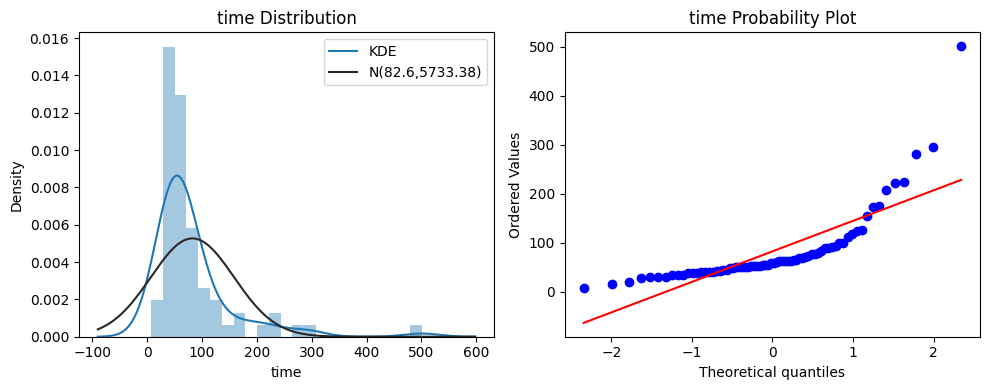

In [6]:
QQ_plot(data['time'], 'time')

In [7]:
from statsmodels.stats.diagnostic import kstest_normal

In [9]:
p_val = kstest_normal(data['time'],'norm')[1]

if p_val < 0.05:
    print('p_value가 ', p_val,'로 0.05보다 작으므로 정규성이 성립하지 않는다.')
else:
    print('p_value가 ', p_val,'로 0.05보다 크므로 정규성이 성립한다.')

p_value가  0.0009999999999998899 로 0.05보다 작으므로 정규성이 성립하지 않는다.


### 잔차의 등분산성 확인

<AxesSubplot: >

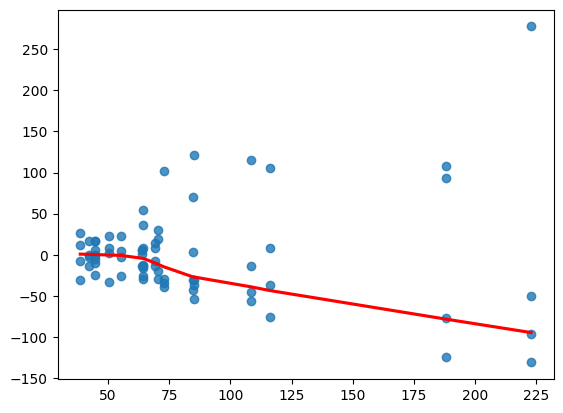

In [10]:
fitted = model.predict(data)
residual = data['time'] - fitted

sns.regplot(x = fitted, y = residual, lowess=True, line_kws={'color':'red'})
# plt.plot([fitted.min(),fitted.max()],[0,0],'--',color='grey')

In [11]:
eq_var = bartlett(
    data['time'][data['SearchEngine'] == 'Google'],
    data['time'][data['SearchEngine'] == 'Naver'],
    data['time'][data['SearchEngine'] == 'Daum'] )

if eq_var[1] < 0.05:
    print('p_value가 ', eq_var[1],'로 0.05보다 작으므로 등분산성이 성립하지 않는다.')
else:
    print('p_value가 ', eq_var[1],'로 0.05보다 크므로 등분산성이 성립한다.')



p_value가  1.90965899237831e-06 로 0.05보다 작으므로 등분산성이 성립하지 않는다.


### 정규성과 등분산성을 갖추기 위한 데이터 변환 (log 변환) 후 동일한 과정 실행

In [12]:
trs_data = data.copy()

trs_data['log_time'] = np.log(trs_data['time'])

trs_data.drop('time',axis=1,inplace=True)

trs_data.head()

,SearchEngine,person,log_time
0,Google,a,3.555348
1,Google,a,4.605170
2,Google,a,3.912023
3,Google,a,4.276666
4,Google,b,3.555348


In [13]:
trs_model = ols('log_time ~ SearchEngine * person', trs_data).fit()

anova_lm(trs_model)

,df,sum_sq,mean_sq,F,PR(>F)
SearchEngine,2.0,3.613425,1.806712,5.200221,0.008603
person,5.0,4.206780,0.841356,2.421657,0.047190
SearchEngine:person,10.0,6.239124,0.623912,1.795793,0.083589
Residual,54.0,18.761217,0.347430,NaN,NaN


C:\Users\thoma\AppData\Local\Temp\ipykernel_2504\3251403580.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data, kde=True, fit=norm)


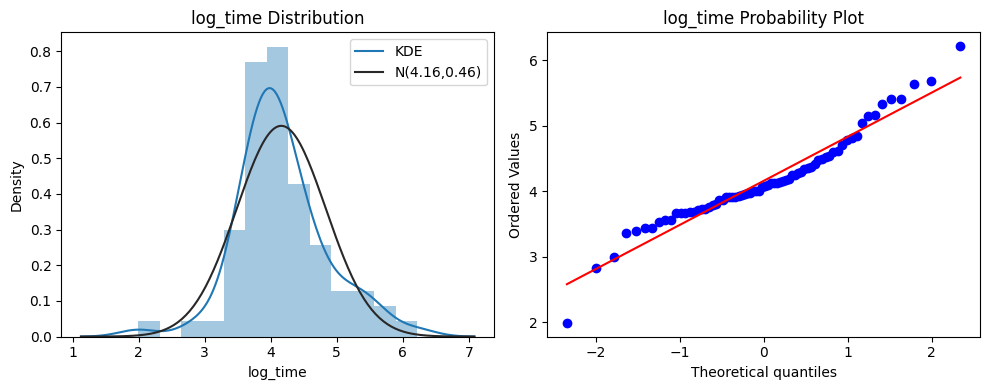

In [14]:
QQ_plot(trs_data['log_time'], 'log_time')

In [15]:
trs_p_val = kstest_normal(trs_data['log_time'],'norm')[1]

if trs_p_val < 0.05:
    print('p_value가 ', trs_p_val,'로 0.05보다 작으므로 정규성이 성립하지 않는다.')
else:
    print('p_value가 ', trs_p_val,'로 0.05보다 크므로 정규성이 성립한다.')

p_value가  0.041390293001563654 로 0.05보다 작으므로 정규성이 성립하지 않는다.


<AxesSubplot: >

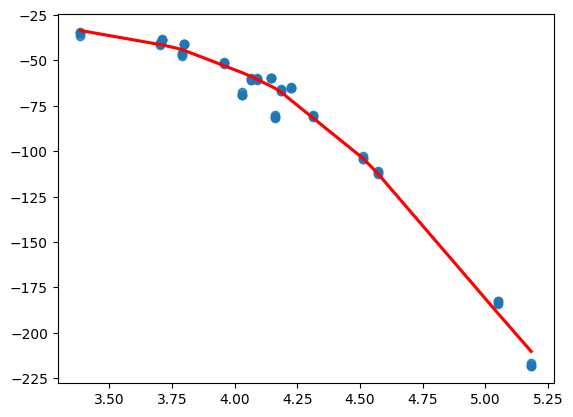

In [16]:
trs_fitted = trs_model.predict(trs_data)
trs_residual = trs_data['log_time'] - fitted

sns.regplot(x = trs_fitted, y = trs_residual, lowess=True, line_kws={'color':'red'})
# plt.plot([fitted.min(),fitted.max()],[0,0],'--',color='grey')

In [17]:
trs_eq_var = bartlett(
    trs_data['log_time'][trs_data['SearchEngine'] == 'Google'],
    trs_data['log_time'][trs_data['SearchEngine'] == 'Naver'],
    trs_data['log_time'][trs_data['SearchEngine'] == 'Daum'] )

print(trs_eq_var)

if trs_eq_var[1] < 0.05:
    print('p_value가 ', trs_eq_var[1],'로 0.05보다 작으므로 등분산성이 성립하지 않는다.')
else:
    print('p_value가 ', trs_eq_var[1],'로 0.05보다 크므로 등분산성이 성립한다.')

BartlettResult(statistic=1.2884239176517942, pvalue=0.5250761607451362)
p_value가  0.5250761607451362 로 0.05보다 크므로 등분산성이 성립한다.


독립성 검정: 추세, 주기, 계절성을 띄는 영역의 데이터가 아니므로 독립성을 만족한다고 가정한다.

### 가설 검정

In [30]:
anv_tb = anova_lm(trs_model)

df = pd.DataFrame(anv_tb)

df.head()

,df,sum_sq,mean_sq,F,PR(>F)
SearchEngine,2.0,3.613425,1.806712,5.200221,0.008603
person,5.0,4.206780,0.841356,2.421657,0.047190
SearchEngine:person,10.0,6.239124,0.623912,1.795793,0.083589
Residual,54.0,18.761217,0.347430,NaN,NaN


In [32]:
pval_SE = df.loc['SearchEngine','PR(>F)'] 
pval_P = df.loc['person','PR(>F)']
pval_SEP = df.loc['SearchEngine:person','PR(>F)']

if pval_SE > 0.05:
    print('Search Engine의 p-val가 ', pval_SE,'로 0.05보다 크므로 Search Engine에 따라 검색 속도에 유의한 차이가 없다.')

else:
    print('Search Engine의 p-val가 ', pval_SE,'로 0.05보다 작으므로 Search Engine에 따라 검색 속도에 유의한 차이가 있다.')


if pval_P > 0.05:
    print('Person 의 p-val가 ', pval_P,'로 0.05보다 크므로 Person에 따라 검색 속도에 유의한 차이가 없다.')

else:
    print('Person의 p-val가 ', pval_P,'로 0.05보다 작으므로 Person에 따라 검색 속도에 유의한 차이가 있다.')

if pval_SEP > 0.05:
    print('Search Engine:Person의 p-val가 ', pval_SEP,'로 0.05보다 크므로 Search Engine과 Person의 교호작용에 따라 검색 속도에 유의한 차이가 없다.')

else:
    print('Search Engine:Person의 p-val가 ', pval_SEP,'로 0.05보다 작으므로 Search Engine과 Person의 교호작용에 따라 검색 속도에 유의한 차이가 있다.')

Search Engine의 p-val가  0.008602657778439535 로 0.05보다 작으므로 Search Engine에 따라 검색 속도에 유의한 차이가 있다.
Person의 p-val가  0.0471901296721677 로 0.05보다 작으므로 Person에 따라 검색 속도에 유의한 차이가 있다.
Search Engine:Person의 p-val가  0.0835891100152078 로 0.05보다 크므로 Search Engine과 Person의 교호작용에 따라 검색 속도에 유의한 차이가 없다.


### 사후 분석

 Bonferroni를 활용한 Search Engine 별 사후 분석

In [57]:
comp = MultiComparison(trs_data['log_time'], trs_data['SearchEngine'])

result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')

print(result[0])

Test Multiple Comparison ttest_ind 
FWER=0.05 method=bonf
alphacSidak=0.02, alphacBonf=0.017
group1 group2   stat   pval  pval_corr reject
---------------------------------------------
  Daum Google  2.6837 0.0101    0.0303   True
  Daum  Naver   2.022  0.049    0.1471  False
Google  Naver -0.8694 0.3891       1.0  False
---------------------------------------------


Daum과 Google 간의 p_value가 0.0101로 0.05보다 작으므로 서로 간의 검색 속도에 유의한 차이가 있다.

Daum과 Naver 간의 p_value 가 0.049로 0.05보다 작으므로 서로 간의 검색 속도에 유의한 차이가 있다.

Google과 Naver 간의 p_value 가 0.3891로 0.05보다 크므로 서로 간의 검색 속도에 유의한 차이가 없다.